# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [70]:
import pandas as pd

In [71]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [72]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [37]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [73]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [74]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business

,자치구,택시운송업 사업체수,택시운송업 종사자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종사자수,두발미용업 사업체수,두발미용업 종사자수,커피전문점 사업체수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 사업체수,기타주점업 종사자수,일반 교과 학원 사업체수,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수
0,강남구,3592,5034,4830,22972,890,974,4674,13016,2482,12510,3248,14546,768,16640,1426,5056,2852,18040,1654,10016
1,강동구,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918
2,강북구,3426,5178,1930,5326,2048,2060,1178,1734,1346,1994,716,2190,80,188,1160,2550,440,1480,724,2352
3,강서구,7470,13844,2650,9168,3598,3724,2622,4704,2030,3502,1380,5060,156,1400,1588,3418,1344,4694,1162,4548
4,관악구,2572,4054,2452,7378,3158,3200,2020,4272,1790,3208,1162,4098,62,380,1316,3344,708,2460,844,3256
5,광진구,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356
6,구로구,5514,7634,2096,6430,2636,2702,1578,2426,1458,2268,842,2768,228,1846,1152,2330,672,2222,856,2992
7,금천구,2200,5196,1734,5238,1870,1994,1342,2762,976,1430,766,2430,400,5150,782,1370,306,974,600,2084
8,노원구,8228,12148,1732,5300,3460,3472,1428,2106,1564,2706,1070,3496,60,246,710,1688,1470,6562,856,3114
9,도봉구,5986,11566,1344,4018,3142,3148,1030,1588,1200,1694,576,1674,44,86,516,954,702,2324,604,1886


In [75]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [76]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [77]:
pd.set_option('display.max_columns', None)
df.head()

,도착 시군구 코드,자치구,계,남자,여자,65세이상고령자,택시운송업 사업체수,택시운송업 종사자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종사자수,두발미용업 사업체수,두발미용업 종사자수,커피전문점 사업체수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 사업체수,기타주점업 종사자수,일반 교과 학원 사업체수,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합)
0,11010,종로구,153684,74018,79666,28064,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.660701,19571837.56
1,11020,중구,131450,63869,67581,24742,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,178,103,3776675,3598932,121.020124,115.324511,21.012462,9306020,44.932366,19899691.04
2,11030,용산구,236518,114571,121947,39461,832,1046,1714,5974,910,932,1582,2428,732,1554,1268,4152,108,634,974,2664,208,1146,600,2368,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,37.373125,14894087.30
3,11040,성동구,291609,141662,149947,46896,2400,5054,1912,5570,2144,2322,1602,2906,978,1702,1094,3718,298,3144,570,1242,516,2988,800,3090,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,43.141640,17635698.46
4,11050,광진구,353110,169525,183585,52604,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,47.249420,18134138.44


In [78]:


from matplotlib import pyplot as plt
import numpy 
import seaborn as sns; sns.set()
plt.rcParams['font.family'] = 'NanumGothic'

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



# 이제 주어진 자료로 정류장수가 부족한 구를 찾아봅니다.


### 가설 1 승차총승개수가 많은 곳에 더 많은 정류장 수가 있을 거다

### 가설 2 총인구수가 많은 곳에 더많은 정류장 수가 있을 거다


In [79]:
new_df=df.loc[:,["자치구", "승차총승객수","하차총승객수", "계", "정류장수"]]

new_df

,자치구,승차총승객수,하차총승객수,계,정류장수
0,종로구,5468935,5205394,153684,349
1,중구,3776675,3598932,131450,178
2,용산구,4189977,4086474,236518,323
3,성동구,2807280,2746738,291609,435
4,광진구,2749448,2753411,353110,269
5,동대문구,5240565,5115379,352592,306
6,중랑구,3792541,3740923,393600,380
7,성북구,6236424,6231238,442680,602
8,강북구,4825181,4671783,300824,413
9,도봉구,3304305,3211421,318100,359


---------------------

### 가설 1 승차총승객수가 많은 곳에 더 많은 정류장 수가 있을 거다

In [80]:

# 피어슨 상관계수 검정
corr = stats.pearsonr(new_df.승차총승객수, new_df.정류장수)
corr

(0.5666813370974585, 0.003141977397117322)

#### 여기서 첫번째가 상관관계이고, 두번째가 P-value 값이다.

#### p-value가 0.05 이하임으로 두변수간의 상관관계가 있다.

In [81]:
X=new_df.승차총승객수.values
Y=new_df.정류장수.values

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

lr.fit(X, Y)



LinearRegression()

In [82]:
print(lr.coef_[0])
print(lr.intercept_)


[4.23754046e-05]
[216.45043298]


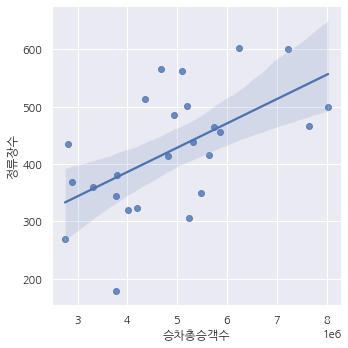

In [83]:
#회귀선을 그려보자
ax = sns.lmplot(x='승차총승객수',y='정류장수', data=df)




# 가장 밑에 떨어진 데이터수가 중구입니다.

#### 각 점별로 어떤데이터인지 구체적으로 확인

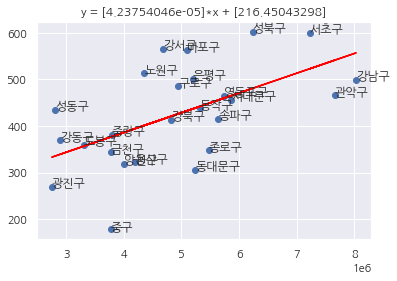

In [84]:
import matplotlib.pyplot as plt
y2 = lr.coef_[0]*X + lr.intercept_
plt.scatter(X, Y)
for i in range(len(new_df)): # 행 개수만큼 순회
     row = new_df.iloc[i] # 한 행씩 꺼내기
     name = row['자치구'] # 이름이 저장된 열
     x = row['승차총승객수'] # x좌표가 저장된 열
     y = row['정류장수'] # y좌표가 저장된 열

     plt.text(x, y, name)
plt.plot(X, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))

plt.show()

In [50]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     10.88
Date:                Wed, 16 Nov 2022   Prob (F-statistic):            0.00314
Time:                        00:24:17   Log-Likelihood:                -146.77
No. Observations:                  25   AIC:                             297.5
Df Residuals:                      23   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        216.4504     65.592      3.300      0.003      80.762     352.139
x1          4.238e-05   1.28e-05      3.298      0.003    1.58e-05     6.9e-05
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.298
Skew:                          -0.122   Prob(JB):                        0.862
Kurtosis:                       2.524   Cond. No.                     1.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 회귀선과 떨이진 값구하기

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


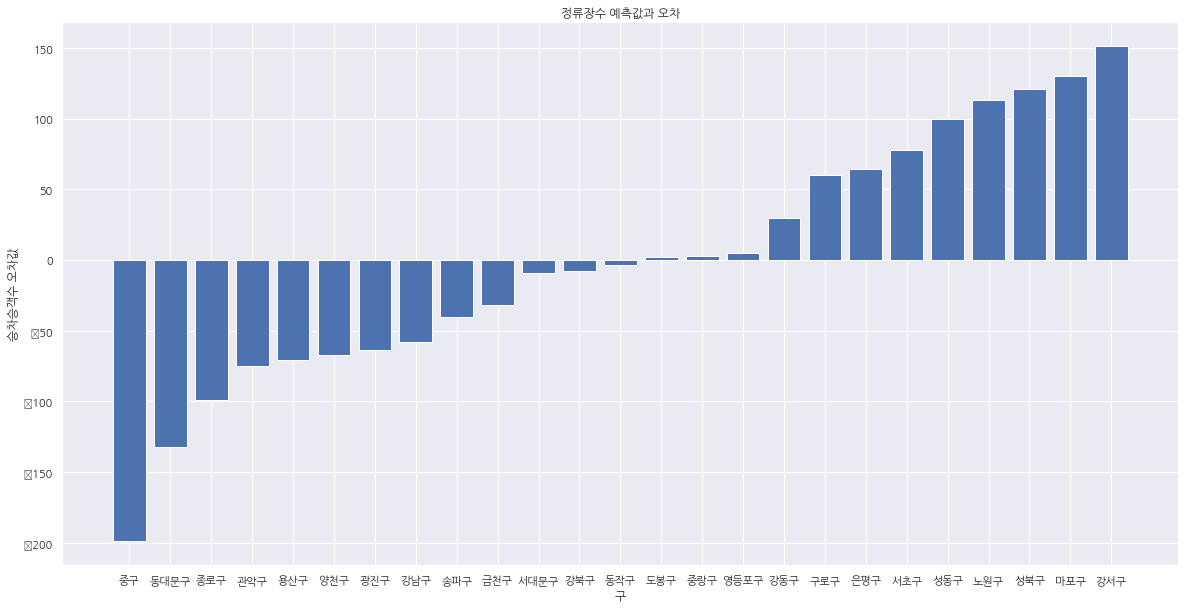

In [85]:
new_df["승차총승객수예측값오차"] = new_df['정류장수']-( lr.coef_[0]* new_df['승차총승객수'] + lr.intercept_)

new_df=new_df.sort_values("승차총승객수예측값오차").reset_index(drop=True)

plt.figure(figsize=(20,10))
plt.title('정류장수 예측값과 오차')
plt.bar(new_df['자치구'], new_df["승차총승객수예측값오차"])
plt.xlabel('구')
plt.ylabel('승차승객수 오차값')


plt.show()

In [86]:
new_df["자치구"].index=new_df["자치구"].index+1

new_df["자치구"]

1       중구
2     동대문구
3      종로구
4      관악구
5      용산구
6      양천구
7      광진구
8      강남구
9      송파구
10     금천구
11    서대문구
12     강북구
13     동작구
14     도봉구
15     중랑구
16    영등포구
17     강동구
18     구로구
19     은평구
20     서초구
21     성동구
22     노원구
23     성북구
24     마포구
25     강서구
Name: 자치구, dtype: object

# 예측된 정류장 수와 가장 차이나는 구는 중구 동대문 구이다.

In [53]:
#df["승객수당정류장수"]=df['정류장수']/df["승차총승객수"]
#df=df.sort_values("승객수당정류장수").reset_index(drop=True)

new_df["자치구"]

0       중구
1     동대문구
2      종로구
3      관악구
4      용산구
5      양천구
6      광진구
7      강남구
8      송파구
9      금천구
10    서대문구
11     강북구
12     동작구
13     도봉구
14     중랑구
15    영등포구
16     강동구
17     구로구
18     은평구
19     서초구
20     성동구
21     노원구
22     성북구
23     마포구
24     강서구
Name: 자치구, dtype: object

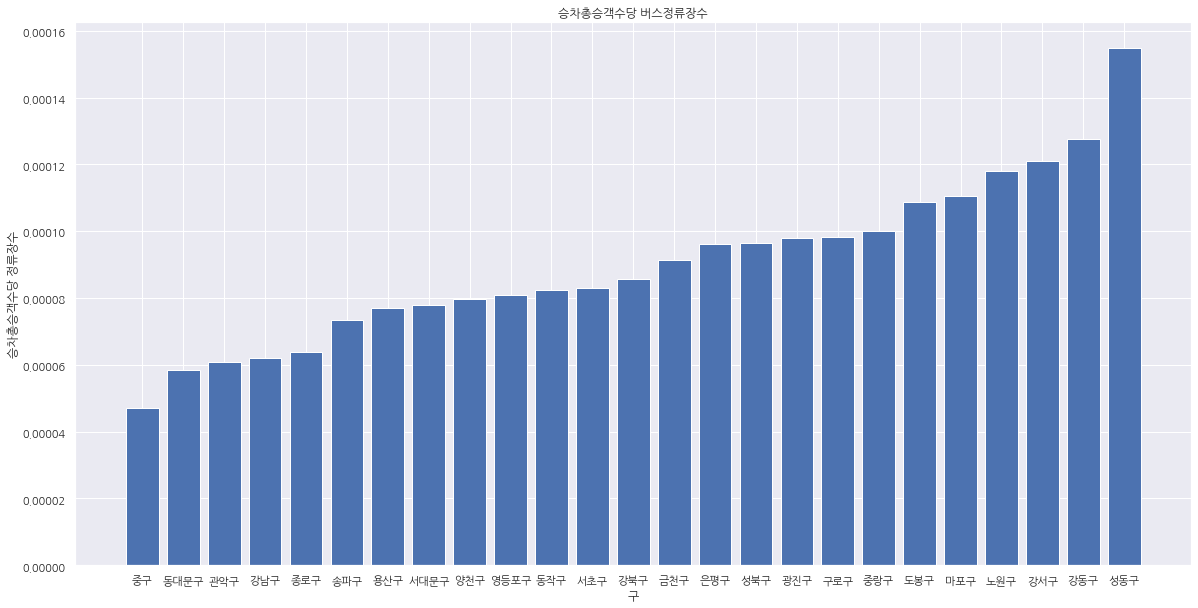

In [20]:
plt.figure(figsize=(20,10))
plt.title('승차총승객수당 버스정류장수')
plt.bar(df['자치구'],df["승객수당정류장수"])
plt.xlabel('구')
plt.ylabel('승차총승객수당 정류장수')


plt.show()

## 정류장수를 승차총승객수로 로 나눠서 승차총승객수 1인당 정류장수를 파악하였는데, 중구 동대문구가 가장 낮게 나왔다.

##  승차총승객수 가설 결론

### 1. 회귀선과 가장 떨어져 있는건  중구 동대문구 파악됨

### 2. 승차승객수 1인당 버스정류장수도 동대문구 중구 가장 낮게나옴

### 3. 중구, 동대문구에 정류장 필요

---

### 가설 2 총인구수가 많은 곳에 더많은 정류장 수가 있을 거다

In [21]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(new_df.계, new_df.정류장수)
corr

(0.5666148323603176, 0.0031462922429467965)

#### 여기서 첫번째가 상관관계이고, 두번째가 P-value 값이다.

#### p-value가 0.05 이하임으로 두변수간의 상관관계가 있다.

In [54]:
X=new_df.계.values
Y=new_df.정류장수.values

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

lr.fit(X, Y)


LinearRegression()

In [55]:
print(lr.coef_[0])
print(lr.intercept_)


[0.00047761]
[238.66495427]


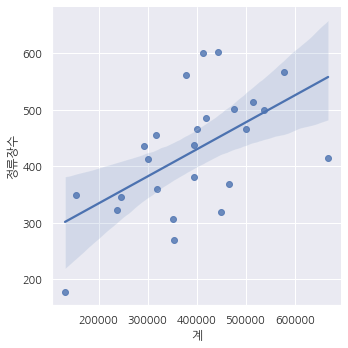

In [56]:
#회귀선을 그려보자
ax = sns.lmplot(x='계',y='정류장수', data=df)




# 가장 밑에 떨어진 데이터수가 중구입니다.

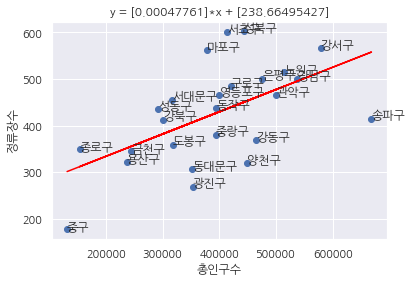

In [57]:
import matplotlib.pyplot as plt
y2 = lr.coef_[0]*X + lr.intercept_
plt.scatter(X, Y)
for i in range(len(new_df)): # 행 개수만큼 순회
     row = new_df.iloc[i] # 한 행씩 꺼내기
     name = row['자치구'] # 이름이 저장된 열
     x = row['계'] # x좌표가 저장된 열
     y = row['정류장수'] # y좌표가 저장된 열

     plt.text(x, y, name)
plt.plot(X, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.xlabel('총인구수')
plt.ylabel('정류장수')

plt.show()

In [58]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     10.88
Date:                Wed, 16 Nov 2022   Prob (F-statistic):            0.00315
Time:                        00:27:52   Log-Likelihood:                -146.77
No. Observations:                  25   AIC:                             297.5
Df Residuals:                      23   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.6650     59.151      4.035      0.001     116.302     361.028
x1             0.0005      0.000      3.298      0.003       0.000       0.001
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.393
Skew:                          -0.009   Prob(JB):                        0.822
Kurtosis:                       2.386   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


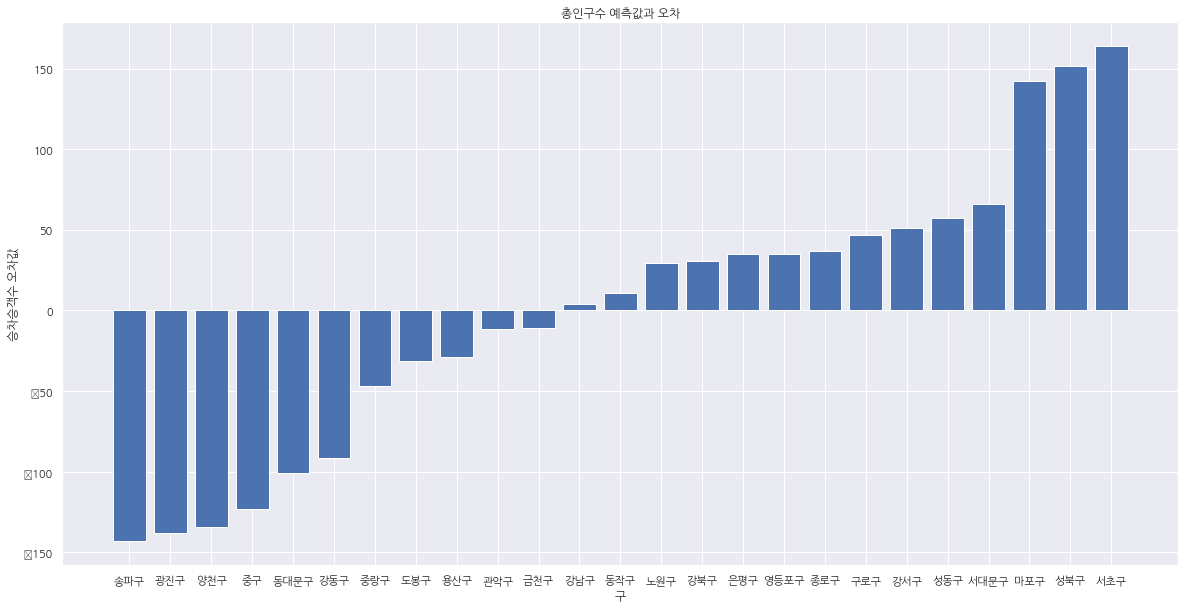

In [65]:
new_df["총인구수예측값오차"] = new_df['정류장수']-( lr.coef_[0]* new_df['계'] + lr.intercept_)

new_df=new_df.sort_values("총인구수예측값오차").reset_index(drop=True)

plt.figure(figsize=(20,10))
plt.title('총인구수 예측값과 오차')
plt.bar(new_df['자치구'], new_df["총인구수예측값오차"])
plt.xlabel('구')
plt.ylabel('승차승객수 오차값')


plt.show()

In [66]:
new_df["자치구"].index=new_df["자치구"].index+1

new_df["자치구"]

1      송파구
2      광진구
3      양천구
4       중구
5     동대문구
6      강동구
7      중랑구
8      도봉구
9      용산구
10     관악구
11     금천구
12     강남구
13     동작구
14     노원구
15     강북구
16     은평구
17    영등포구
18     종로구
19     구로구
20     강서구
21     성동구
22    서대문구
23     마포구
24     성북구
25     서초구
Name: 자치구, dtype: object

### 송파구 광진구 양천구가 가장 낮게나옴

In [67]:
df["인구수당정류장수"]=df['정류장수']/df["계"]
df=df.sort_values("인구수당정류장수").reset_index(drop=True)

df


,도착 시군구 코드,자치구,계,남자,여자,65세이상고령자,택시운송업 사업체수,택시운송업 종사자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종사자수,두발미용업 사업체수,두발미용업 종사자수,커피전문점 사업체수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 사업체수,기타주점업 종사자수,일반 교과 학원 사업체수,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합),인구수당정류장수
0,11240,송파구,668261,321963,346298,99854,5276,9700,3150,11520,3820,3862,3354,6380,2274,4656,1950,6744,294,5660,1256,2938,1752,8320,1278,5562,415,55,5641742,5603488,114.270072,113.495260,25.429707,10610520,83.934768,35021698.11,0.000621
1,11150,양천구,449378,219882,229496,69953,5470,9884,1662,5600,2572,2586,1844,2728,1676,2856,804,2750,50,104,830,1702,2568,11608,562,2222,319,56,4009172,3851173,97.627526,93.780086,22.793734,7379950,47.117776,15255369.53,0.000710
2,11050,광진구,353110,169525,183585,52604,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,47.249420,18134138.44,0.000762
3,11250,강동구,465097,227891,237206,75477,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918,369,21,2890053,2830506,99.161194,97.118065,25.670084,8430800,64.858004,21301249.36,0.000793
4,11060,동대문구,352592,172318,180274,62963,3092,4186,2472,7132,2862,2912,1684,2416,1222,1782,988,2944,422,1952,998,2164,604,1968,884,3018,306,73,5240565,5115379,131.841430,128.692017,21.673451,8838130,40.418019,16481902.36,0.000868
5,11230,강남구,537338,257096,280242,79575,3592,5034,4830,22972,890,974,4674,13016,2482,12510,3248,14546,768,16640,1426,5056,2852,18040,1654,10016,499,91,8030483,7569213,128.767927,121.371512,23.094565,11437560,90.580494,44859899.30,0.000929
6,11210,관악구,500336,250450,249886,80686,2572,4054,2452,7378,3158,3200,2020,4272,1790,3208,1162,4098,62,380,1316,3344,708,2460,844,3256,466,86,7655819,7792476,154.753674,157.516040,23.377928,8772170,50.429574,18922840.20,0.000931
7,11070,중랑구,393600,193623,199977,72851,7268,12524,1982,4958,3608,3754,1476,2208,1580,2216,762,2074,126,568,1070,2000,576,2090,998,3008,380,48,3792541,3740923,87.403863,86.214261,23.412789,7939300,41.594075,14104592.26,0.000965
8,11160,강서구,578426,277797,300629,93924,7470,13844,2650,9168,3598,3724,2622,4704,2030,3502,1380,5060,156,1400,1588,3418,1344,4694,1162,4548,566,49,4681083,4652828,88.119480,87.587591,25.124068,9388010,58.972061,22035854.10,0.000979
9,11110,노원구,514445,247417,267028,89426,8228,12148,1732,5300,3460,3472,1428,2106,1564,2706,1070,3496,60,246,710,1688,1470,6562,856,3114,514,57,4353295,4292724,88.476211,87.245168,24.029515,8975240,55.716682,20810682.25,0.000999


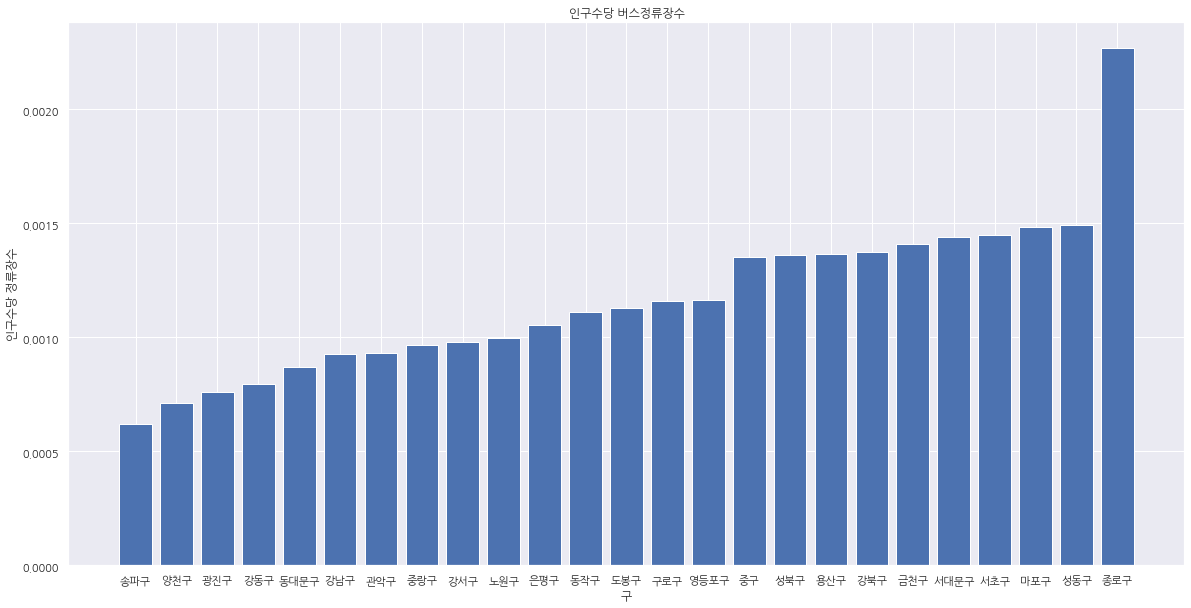

In [68]:
plt.figure(figsize=(20,10))
plt.title('인구수당 버스정류장수')
plt.bar(df['자치구'],df["인구수당정류장수"])
plt.xlabel('구')
plt.ylabel('인구수당 정류장수')


plt.show()

In [69]:
df["자치구"].index=df["자치구"].index+1

df["자치구"]

1      송파구
2      양천구
3      광진구
4      강동구
5     동대문구
6      강남구
7      관악구
8      중랑구
9      강서구
10     노원구
11     은평구
12     동작구
13     도봉구
14     구로구
15    영등포구
16      중구
17     성북구
18     용산구
19     강북구
20     금천구
21    서대문구
22     서초구
23     마포구
24     성동구
25     종로구
Name: 자치구, dtype: object

### 인구수당 비율로 따지면 송파구 양천구 광진구가 가장 낮게 나온다.

## 총인구수 가설 결론

### 1. 회귀선과 가장 떨어져 있는건  송파구 양천구 광진구 파악됨

### 2. 승차승객수 1인당 버스정류장수도 송파구 양천구 광진구 가장 낮게나옴

### 3. 송파구 양천구 광진구 정류장 필요

##  승차총승객수 가설 결론 (위에 내용다시 반복설명)

### 1. 회귀선과 가장 떨어져 있는건  중구 동대문구 파악됨

### 2. 승차승객수 1인당 버스정류장수도 동대문구 중구 가장 낮게나옴

### 3. 중구, 동대문구에 정류장 필요

## 최종 결론

### 1.총인구수를 독립변수로두고 분석시 부족한 구는 송파구 양천구 광진구


### 2.총승차객수를 독립변수로두고 분석시 부족한 구는 중구 동대문구이다.


### 3. 어떤변수를 두고분석하냐에 따라 다른 결로 도출, 어떤 변수 선택할지 신중한선택이 필요